Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship. I will cover these in this video.
1. Numerical Data Plotting -->
relplot()
scatterplot()
lineplot()
2. Categorical Data Ploting -->
catplot()
boxplot()
stripplot()
swarmplot()
etc…
3. Visualizing Distribution of the Data -->
distplot()
kdeplot()
jointplot()
rugplot()
4. Linear Regression and Relationship -->
regplot()
lmplot()
5. Controlling Plotted Figure Aesthetics -->
figure styling
axes styling
color palettes
etc..


   relplot() >  relational plot /// 
   contains scatterplot() by default /// [ kind='line']  converts it into lineplot()


Numerical Data Plotting 


1.   relplot()
2.   scatterplot()
3.   lineplot()



In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sns.set(style = 'darkgrid')

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


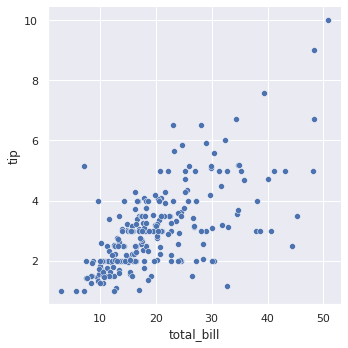

In [ ]:
sns.relplot(x = 'total_bill',y='tip',data=tips)  # facetgrid

In [ ]:
tips['smoker'].value_counts()  # prints the count

No     151
Yes     93
Name: smoker, dtype: int64

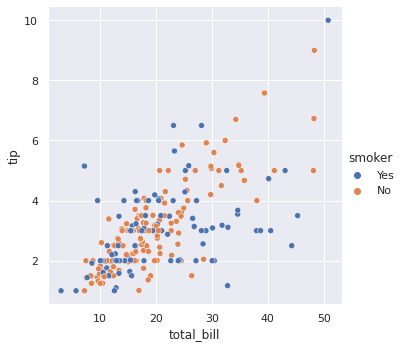

In [ ]:
sns.relplot(x='total_bill', y='tip',data=tips, hue='smoker')   
#/ hue :  changes color of plotting points of the different types present in the coloumn given to hue
#  coloum smoker  2 types  > yes    > no   { diff colour for each type}

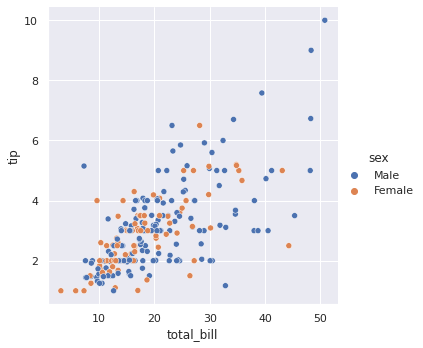

In [ ]:
sns.relplot(x='total_bill', y='tip', data=tips, hue='sex') # seperates tips given by male and female with seperate colors

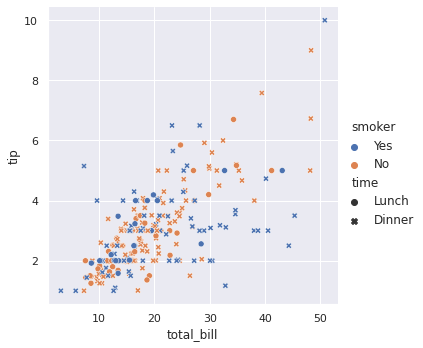

In [ ]:
sns.relplot(x='total_bill', y='tip', data=tips, hue='smoker',style='time') 
# style :  various shapes of plotting points for various types                                               
# coloum time    type =2  > Lunch   > dinner  { different shapes for each one of them}

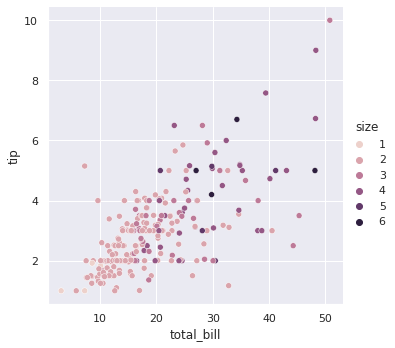

In [ ]:
sns.relplot(x='total_bill',y='tip',hue='size',data=tips) 

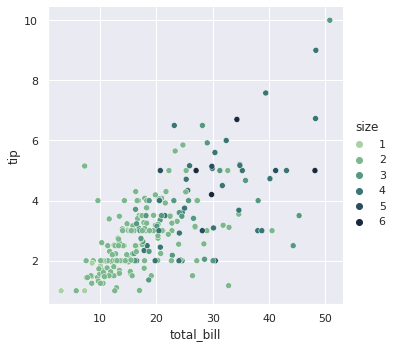

In [ ]:
sns.relplot(x='total_bill', y='tip', data=tips, hue='size',palette='ch:r=-.5,l=0.75') # palette :  various shades of same color of plotting points 
                                        # for various types present in "size" coloum

In [ ]:
sns.relplot(x='total_bill', y='tip', data=tips, hue='sex',size='size')  # size :  various sizes of plotting points
# coloum  size    types= 6   >1  .....  >6  {different size for each type}

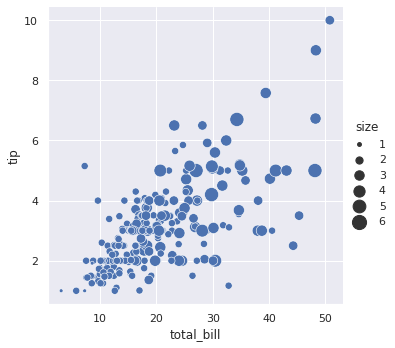

In [ ]:
sns.relplot(x='total_bill', y='tip', data=tips, size='size',sizes=(15,200))
# sizes is used for usre to set size of each type present in the coloum given in size attribute

 ----->    lineplot()   <-----
 Dataset (2)
Created from pandas

In [ ]:
from numpy.random import randn

In [ ]:
df=pd.DataFrame(dict(time=np.arange(500), value= randn(500).cumsum()))
df.head()

,time,value
0,0,-0.516903
1,1,-1.412712
2,2,-2.091313
3,3,-2.043996
4,4,-2.079295


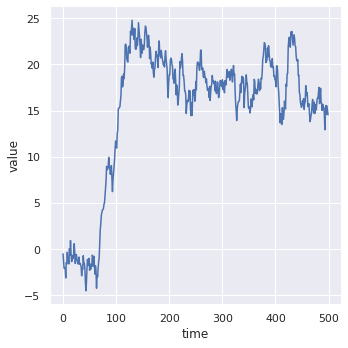

In [ ]:
sns.relplot(x='time',y='value',kind='line',data=df,sort=True)  # plots using line

Dataset (3)
Created from pandas

In [ ]:
df=pd.DataFrame(randn(500,2).cumsum(axis=0),columns=['time','value'])
df.head()

,time,value
0,0.597661,0.219060
1,0.219253,-0.272525
2,1.601162,-1.373588
3,2.146182,-1.657509
4,2.095371,-2.497695


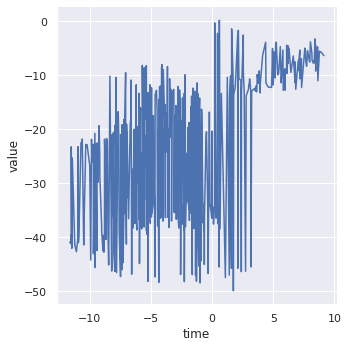

In [ ]:
sns.relplot(x='time',y='value',data=df,kind='line',sort=True)

Dataset (4) 
Inbuilt dataset from Seaborn(fmri)

In [ ]:
fmri=sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


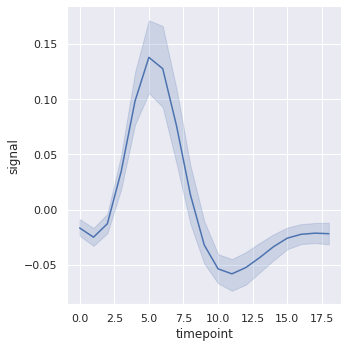

In [ ]:
sns.relplot(x='timepoint', y='signal',data=fmri,kind='line')

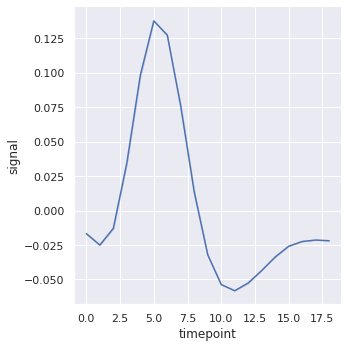

In [ ]:
sns.relplot(x='timepoint', y='signal', data=fmri,kind='line',ci=False)  # ci : confidence interval

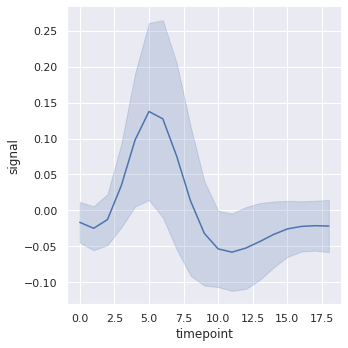

In [ ]:
sns.relplot(x='timepoint', y='signal', data=fmri,kind='line',ci='sd') #  sd   > standard deviation

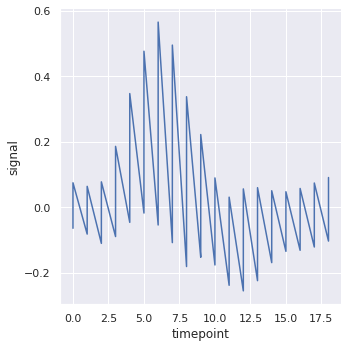

In [ ]:
sns.relplot(x='timepoint',y='signal',data=fmri,estimator=None,kind='line')

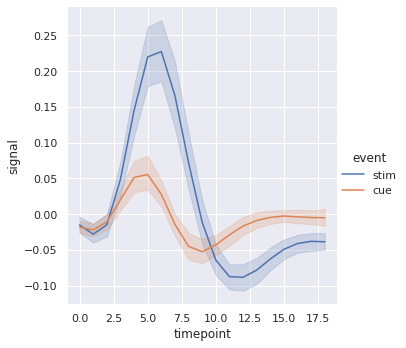

In [ ]:
sns.relplot(x='timepoint',y='signal',hue='event',kind='line',data=fmri)  # event is a feature   and hue divides it with seperate color for each event

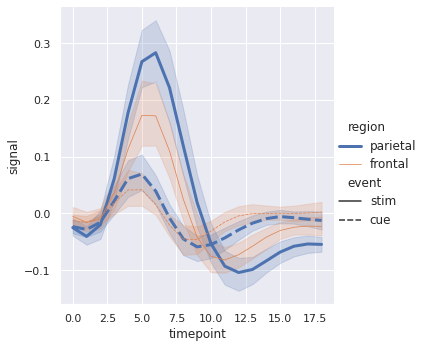

In [ ]:
sns.relplot(x='timepoint',y='signal',data=fmri,hue='region',style='event',size='region',kind='line')
# hue , size = coloumn region    // 2 types of regions  { 2 different colors , 2 different sizes (but same shape) }      
# style = coloumn event   // 2 types of events  { 2 different shapes (but same color)}

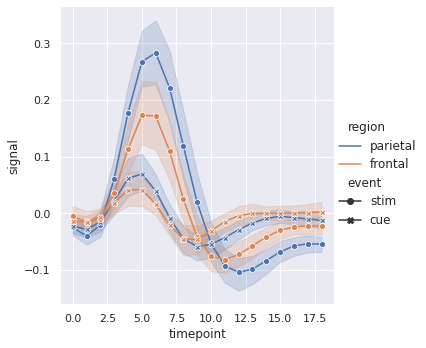

In [ ]:
sns.relplot(x='timepoint',y='signal',data=fmri,hue='region',style='event',kind='line',markers=True,dashes=False)

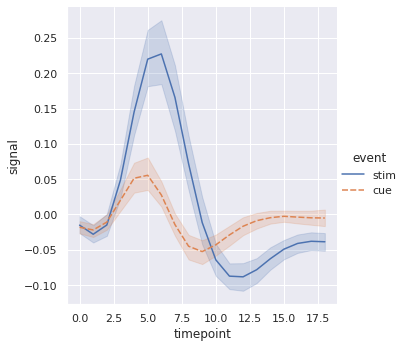

In [ ]:
sns.relplot(x='timepoint',y='signal',data=fmri,kind='line',hue='event',style='event')

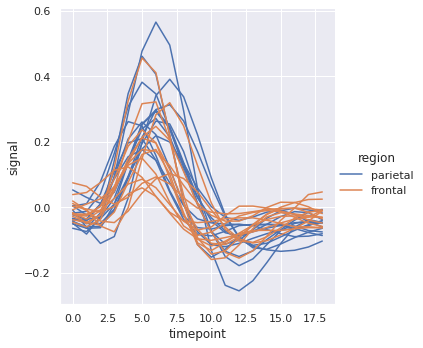

In [ ]:
sns.relplot(x='timepoint',y='signal',kind='line',hue='region',units='subject',estimator=None,data=fmri.query("event== 'stim'"))
# .query  helps to set specifications
#  in above code only "stim" type from event-coloum is used

Dataset (5) Inbuilt dataset from Seaborn(dots)

In [ ]:
dots=sns.load_dataset('dots').query("align=='dots'")
dots.head()
# gets only dots type from align-coloum

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


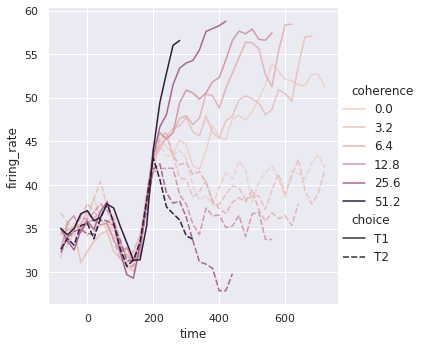

In [ ]:
sns.relplot(x='time',y='firing_rate',data=dots,kind='line',hue='coherence',style='choice')

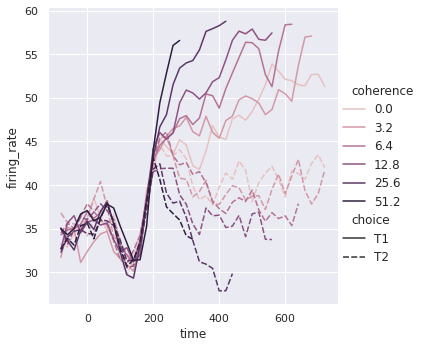

In [ ]:
palette=sns.cubehelix_palette(light=0.8,n_colors=6)
sns.relplot(x='time',y='firing_rate',data=dots,kind='line',hue='coherence',style='choice',palette=palette)

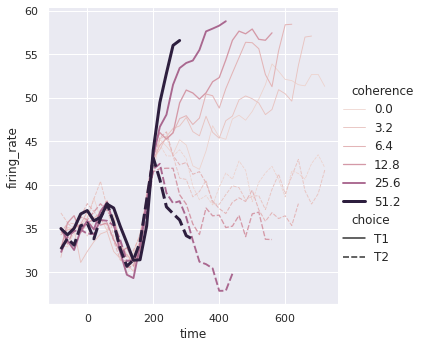

In [ ]:
sns.relplot(x='time',y='firing_rate',hue='coherence',size='coherence',style='choice',kind='line',data=dots)

Dataset(5) Created from pandas

In [ ]:
df=pd.DataFrame(dict(time=pd.date_range('2019-06-02',periods=500),value=randn(500).cumsum()))
df.head()

,time,value
0,2019-06-02,-0.750789
1,2019-06-03,-1.164516
2,2019-06-04,-1.427561
3,2019-06-05,-1.235873
4,2019-06-06,-1.281346


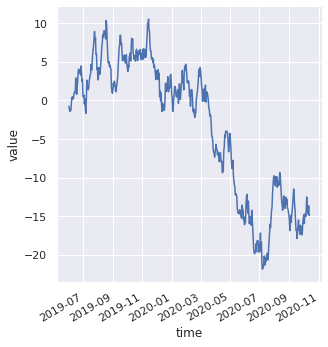

In [ ]:
g=sns.relplot(x='time',y='value',data=df,kind='line')
g.fig.autofmt_xdate()
# formats date 

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


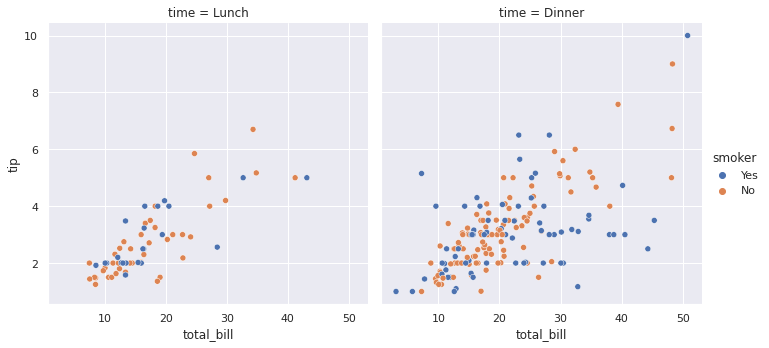

In [ ]:
sns.relplot(x='total_bill',y='tip',hue='smoker',col='time',data=tips)
# 2 graphs are output because [col='time'] has 2 types (lunch , dinner)

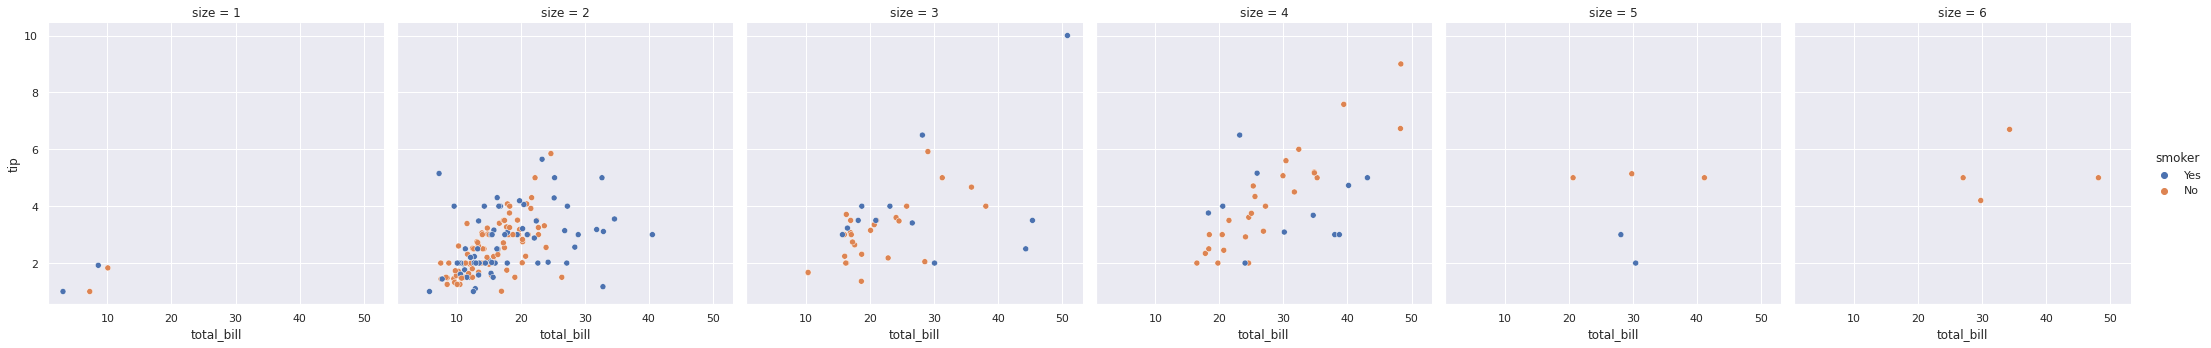

In [ ]:
sns.relplot(x='total_bill',y='tip',hue='smoker',col='size',data=tips)

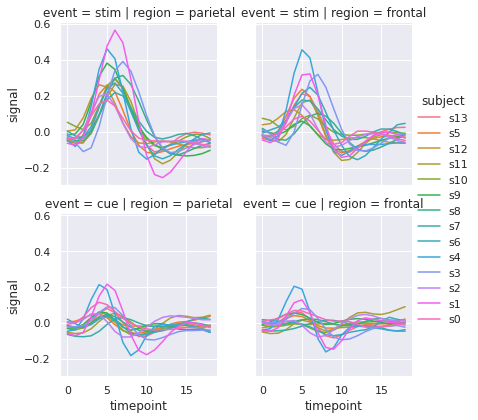

In [ ]:
sns.relplot(x='timepoint',y='signal',hue='subject',col='region',row='event',height=3,kind='line',estimator=None,data=fmri)

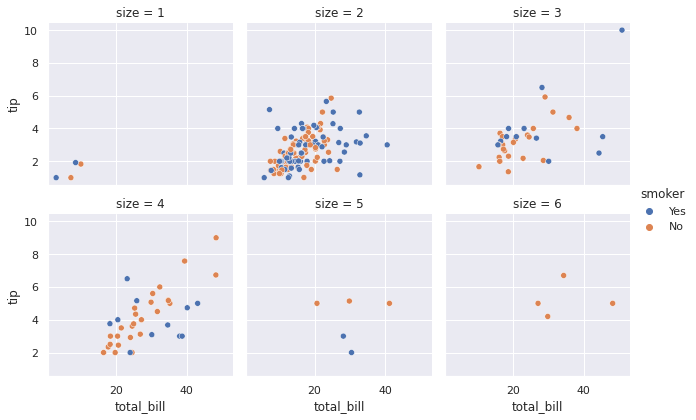

In [ ]:
sns.relplot(x='total_bill',y='tip',hue='smoker',col='size',data=tips,col_wrap=3,height=3)

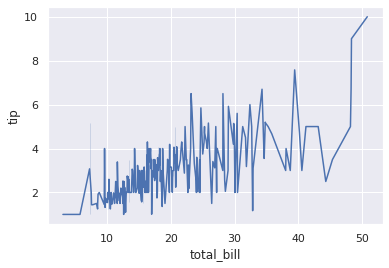

In [ ]:
sns.lineplot(x='total_bill',y='tip',data=tips) # lineplot

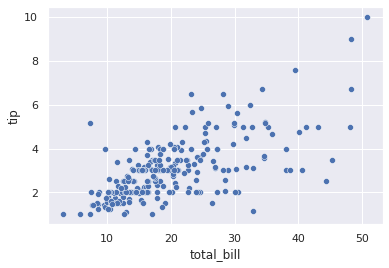

In [ ]:
sns.scatterplot(x='total_bill',y='tip',data=tips)  # scatterplot

In [ ]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


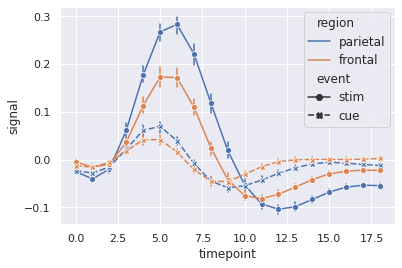

In [ ]:
sns.lineplot(x='timepoint',y='signal',data=fmri,hue='region',style='event',markers=True,ci=50,err_style='bars')

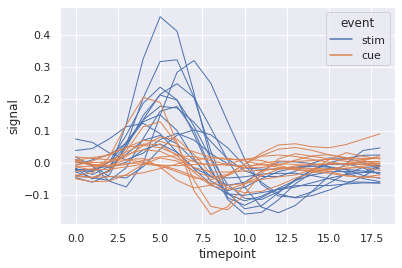

In [ ]:
sns.lineplot(x='timepoint',y='signal',hue='event',units='subject',estimator=None,lw=1,data=fmri.query("region=='frontal'"))

In [ ]:
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


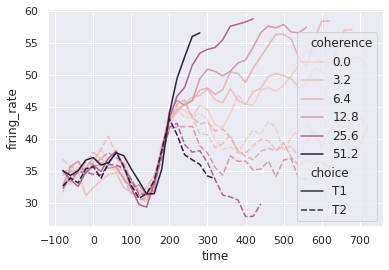

In [ ]:
sns.lineplot(x='time',y='firing_rate',hue='coherence',style='choice',data=dots)

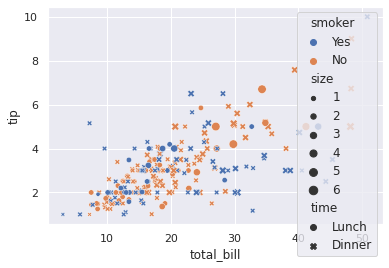

In [ ]:
sns.scatterplot(x='total_bill',y='tip',data=tips,hue='smoker',size='size',style='time')

Dataset (6) ---> Imported from Seaborn(Iris)

In [ ]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


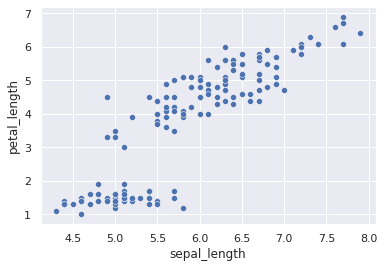

In [ ]:
sns.scatterplot(x='sepal_length',y='petal_length',data=iris)

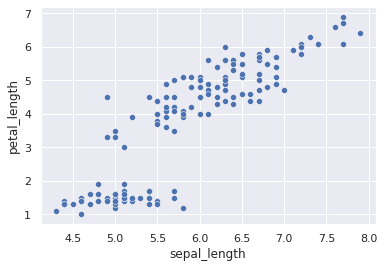

In [ ]:
sns.scatterplot(x=iris['sepal_length'],y=iris['petal_length'])

Categorical Data Ploting 

1.   catplot()
2.   boxplot()
3.   stripplot()
4.   swarmplot()








In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tc=sns.load_dataset('titanic')

In [ ]:
tc.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Dataset 'Titanic' from Seaborn

> catplot()   default representation is scatterplot




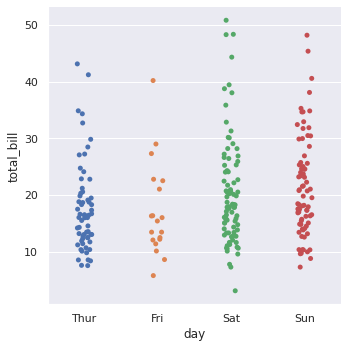

In [ ]:
sns.catplot(x='day',y='total_bill',data=tips) 
# hereb x-axis is categorical data y-axis is numerical data

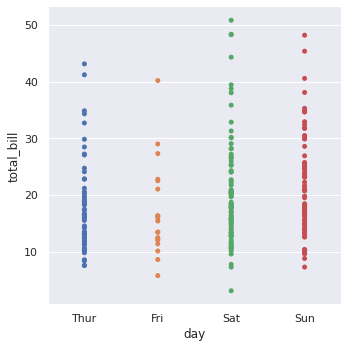

In [ ]:
sns.catplot(x='day',y='total_bill',data=tips,jitter=False) 

In [ ]:
sns.catplot(x='day',y='total_bill',data=tips,kind='swarm',hue='sex') 

**Data Visualization --- Kaggle**

In [ ]:
import pandas as pd
import seaborn as sb

In [ ]:
peng = pd.read_csv('/content/penguins_size.csv',index_col='species')

In [ ]:
peng.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


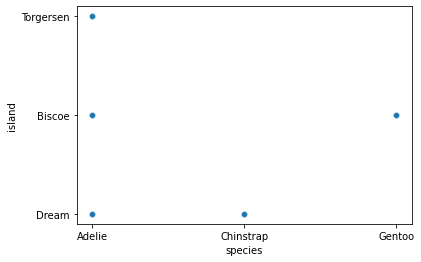

In [ ]:
sb.scatterplot(x=peng.index,y='culmen_length_mm')